<a href="https://colab.research.google.com/github/Protachevicz/Autapses_in_a_neuronal_area/blob/main/Fundos_Imobili%C3%A1rios_FundsExplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---
# **Análise de Fundos de Investimento Imobiliário (FIIs) com Python**
---

# **1. Bibliotecas utilizadas**

In [ ]:
# Algumas das bibliotecas fundamentais nas técnicas de Webscraping
# Bibliotecas opcionais e menos representativas (por ex., seaborn para colorir dataframe) estarão dispostas ao longo do código
# A instalação é necessária apenas na primeira vez de uso

!pip install requests
!pip install bs4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# **2. Webscraping para Rendimentos de Fundos Imobiliários (FIIs)**

---
Como o foco dessa live é a **análise de Fundos Imobiliários**, vamos acelerar a parte de webscraping dos dados. Se for do interesse do público, podemos programar uma próxima live explorando apenas a mineração de dados na web

---


https://www.fundsexplorer.com.br/ranking

In [ ]:
#FII_url = requests.get("https://www.fundsexplorer.com.br/ranking")
FII_url = requests.get("https://statusinvest.com.br/fundos-imobiliarios/busca-avancada")
FII_url

<Response [403]>

In [ ]:
#FII_url.text

In [ ]:
FII_bs4 = BeautifulSoup(FII_url.text, "html.parser")
#FII_bs4.head()

In [ ]:
FII_table = FII_bs4.findAll(attrs = {'id':'scroll-wrapper'})

#FII_table = FII_bs4.findAll(attrs = {'id':'containerBackToUp'})

#FII_table = FII_bs4.findAll(attrs = {'id':'#upTo--default-fiis-table'})

#FII_table = FII_bs4.findAll(attrs = {'id':'scroll-table-container'})




In [ ]:
#FII_df = pd.read_html(str(FII_table[0]))[0]

In [ ]:
#FII_df.columns

Aqui temos o diamante bruto, os dados de todos os FIIs disponíveis (número de linhas do dataframe), com todos os seus multiplos parametros (número de colunas df)

In [ ]:
#str(list(FII_df['Código do fundo'].sort_values()))

In [ ]:
#print(FII_table)

Código da planilha

In [ ]:
SHEET_ID = '1mWc_h8cubvNogLs9m50vrnSM66KFFuQ2a2gVeI6HLac'
SHEET_NAME = 'AAPL'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
df_1 = pd.read_csv(url)
df_1.head()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,19","688.306,81","0,96","0,12","1,31 %","3,90 %","7,85 %","15,52 %",...,"1,25 %","0,00 %","0,00 %","0,00 %",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"71,00","64.761,17","0,7","0,5","0,64 %","2,34 %","5,00 %","9,44 %",...,"0,49 %","10,40 %","10,95 %","18,84 %",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,"97,40","1.401.229,61","1,01","0,95","0,96 %","2,89 %","5,98 %","12,57 %",...,"0,99 %","1,54 %","2,54 %","8,97 %",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,"9,37","403.459,97",NaN,"0,11","1,05 %","3,48 %","7,61 %","16,14 %",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"52,14","417.488,53","0,62","0,71","1,35 %","3,07 %","8,11 %","15,03 %",...,"0,84 %","-10,03 %","-9,27 %","-8,22 %",4,"16,83",17.213,NaN,NaN,NaN


In [ ]:
df_1.tail()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
448,XTED11,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",NaN,NaN,NaN,NaN,...,"0,00 %","-0,36 %","-0,36 %","-3,45 %",1,"29,46",4.098,NaN,NaN,NaN
449,YUFI11,FUNDO DE DESENVOLVIMENTO,90,"3.081,60","0,9","0,39","0,00 %","0,00 %","0,00 %","1,09 %",...,NaN,NaN,NaN,NaN,28,"264,36",63,NaN,NaN,NaN
450,YUFI11B,INDEFINIDO,NaN,NaN,NaN,"0,63","0,00 %","0,00 %","0,00 %","0,00 %",...,"0,60 %","-0,01 %","0,59 %","6,32 %",0,NaN,0,NaN,NaN,NaN
451,ZAVI11,INDEFINIDO,"128,39","718.200,28","0,97","1,34","1,01 %","3,01 %","5,85 %","11,22 %",...,NaN,NaN,NaN,NaN,10,"22,9",5.903,NaN,NaN,NaN
452,ZIFI11,FUNDO DE DESENVOLVIMENTO,"863,99","3.841,77","0,44","3,31","0,00 %","0,00 %","0,00 %","0,00 %",...,NaN,NaN,NaN,NaN,0,"74,15",66,NaN,NaN,NaN


In [ ]:
FII_df = df_1

# **3. Organização dos dados extraídos**

**Observação**: existem diversas formas muito mais elegantes de manipulação desses dados, usando estruturas condicionais e de repetição, por exemplo<p>
Entretanto, vamos tentar trazer essa manipulação usando funções e métodos mais simples, mesmo que exijam algumas etapas extras

In [ ]:
# Faremos uma cópia do dataframe para manipulá-lo com mais liberdade e, caso
# editemos algo, possamos reverter a ediçao sem um novo webscraping

FII_df_backup = FII_df.copy()

In [ ]:
FII_df.head()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,19","688.306,81","0,96","0,12","1,31 %","3,90 %","7,85 %","15,52 %",...,"1,25 %","0,00 %","0,00 %","0,00 %",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"71,00","64.761,17","0,7","0,5","0,64 %","2,34 %","5,00 %","9,44 %",...,"0,49 %","10,40 %","10,95 %","18,84 %",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,"97,40","1.401.229,61","1,01","0,95","0,96 %","2,89 %","5,98 %","12,57 %",...,"0,99 %","1,54 %","2,54 %","8,97 %",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,"9,37","403.459,97",NaN,"0,11","1,05 %","3,48 %","7,61 %","16,14 %",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"52,14","417.488,53","0,62","0,71","1,35 %","3,07 %","8,11 %","15,03 %",...,"0,84 %","-10,03 %","-9,27 %","-8,22 %",4,"16,83",17.213,NaN,NaN,NaN


In [ ]:
FII_df.dtypes

FUNDOS                      object
SETOR                       object
PREÇO ATUAL (R$)            object
LIQUIDEZ DIÁRIA (R$)        object
P/VP                        object
ÚLTIMO DIVIDENDO            object
DIVIDEND YIELD              object
DY (3M) ACUMULADO           object
DY (6M) ACUMULADO           object
DY (12M) ACUMULADO          object
DY (3M) MÉDIA               object
DY (6M) MÉDIA               object
DY (12M) MÉDIA              object
DY ANO                      object
VARIAÇÃO PREÇO              object
RENTAB. PERÍODO             object
RENTAB. ACUMULADA           object
PATRIMÔNIO LÍQUIDO          object
VPA                         object
P/VPA                       object
DY PATRIMONIAL              object
VARIAÇÃO PATRIMONIAL        object
RENTAB. PATR. PERÍODO       object
RENTAB. PATR. ACUMULADA     object
QUANT. ATIVOS                int64
VOLATILIDADE                object
NUM. COTISTAS               object
TAX. GESTÃO                float64
TAX. PERFORMANCE    

In [ ]:
# Erro esperado, pois a variável não é float
#np.max(FII_df['Preço Atual'])

In [ ]:
FII_df['PREÇO ATUAL (R$)']

0        9,19
1       71,00
2       97,40
3        9,37
4       52,14
        ...  
448      8,82
449        90
450       NaN
451    128,39
452    863,99
Name: PREÇO ATUAL (R$), Length: 453, dtype: object

In [ ]:
FII_df.iloc[0]

FUNDOS                             AAZQ11
SETOR                          INDEFINIDO
PREÇO ATUAL (R$)                     9,19
LIQUIDEZ DIÁRIA (R$)           688.306,81
P/VP                                 0,96
ÚLTIMO DIVIDENDO                     0,12
DIVIDEND YIELD                     1,31 %
DY (3M) ACUMULADO                  3,90 %
DY (6M) ACUMULADO                  7,85 %
DY (12M) ACUMULADO                15,52 %
DY (3M) MÉDIA                      1,30 %
DY (6M) MÉDIA                      1,31 %
DY (12M) MÉDIA                     1,29 %
DY ANO                             5,22 %
VARIAÇÃO PREÇO                     0,44 %
RENTAB. PERÍODO                    1,75 %
RENTAB. ACUMULADA                  6,36 %
PATRIMÔNIO LÍQUIDO         230.857.797,15
VPA                                  9,60
P/VPA                                0,96
DY PATRIMONIAL                     1,25 %
VARIAÇÃO PATRIMONIAL               0,00 %
RENTAB. PATR. PERÍODO              0,00 %
RENTAB. PATR. ACUMULADA           

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FUNDOS                   453 non-null    object 
 1   SETOR                    452 non-null    object 
 2   PREÇO ATUAL (R$)         417 non-null    object 
 3   LIQUIDEZ DIÁRIA (R$)     409 non-null    object 
 4   P/VP                     387 non-null    object 
 5   ÚLTIMO DIVIDENDO         453 non-null    object 
 6   DIVIDEND YIELD           416 non-null    object 
 7   DY (3M) ACUMULADO        416 non-null    object 
 8   DY (6M) ACUMULADO        416 non-null    object 
 9   DY (12M) ACUMULADO       416 non-null    object 
 10  DY (3M) MÉDIA            416 non-null    object 
 11  DY (6M) MÉDIA            416 non-null    object 
 12  DY (12M) MÉDIA           416 non-null    object 
 13  DY ANO                   415 non-null    object 
 14  VARIAÇÃO PREÇO           4

In [ ]:
FII_df = FII_df.replace(to_replace = r'^R\$ ', value = '', regex = True)

In [ ]:
FII_df.head()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,19","688.306,81","0,96","0,12","1,31 %","3,90 %","7,85 %","15,52 %",...,"1,25 %","0,00 %","0,00 %","0,00 %",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"71,00","64.761,17","0,7","0,5","0,64 %","2,34 %","5,00 %","9,44 %",...,"0,49 %","10,40 %","10,95 %","18,84 %",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,"97,40","1.401.229,61","1,01","0,95","0,96 %","2,89 %","5,98 %","12,57 %",...,"0,99 %","1,54 %","2,54 %","8,97 %",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,"9,37","403.459,97",NaN,"0,11","1,05 %","3,48 %","7,61 %","16,14 %",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"52,14","417.488,53","0,62","0,71","1,35 %","3,07 %","8,11 %","15,03 %",...,"0,84 %","-10,03 %","-9,27 %","-8,22 %",4,"16,83",17.213,NaN,NaN,NaN


In [ ]:
FII_df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,19","688.306,81","0,96","0,12","1,31 %","3,90 %","7,85 %","15,52 %",...,"1,25 %","0,00 %","0,00 %","0,00 %",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"71,00","64.761,17","0,7","0,5","0,64 %","2,34 %","5,00 %","9,44 %",...,"0,49 %","10,40 %","10,95 %","18,84 %",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,"97,40","1.401.229,61","1,01","0,95","0,96 %","2,89 %","5,98 %","12,57 %",...,"0,99 %","1,54 %","2,54 %","8,97 %",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,"9,37","403.459,97",NaN,"0,11","1,05 %","3,48 %","7,61 %","16,14 %",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"52,14","417.488,53","0,62","0,71","1,35 %","3,07 %","8,11 %","15,03 %",...,"0,84 %","-10,03 %","-9,27 %","-8,22 %",4,"16,83",17.213,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,XTED11,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",NaN,NaN,NaN,NaN,...,"0,00 %","-0,36 %","-0,36 %","-3,45 %",1,"29,46",4.098,NaN,NaN,NaN
449,YUFI11,FUNDO DE DESENVOLVIMENTO,90,"3.081,60","0,9","0,39","0,00 %","0,00 %","0,00 %","1,09 %",...,NaN,NaN,NaN,NaN,28,"264,36",63,NaN,NaN,NaN
450,YUFI11B,INDEFINIDO,NaN,NaN,NaN,"0,63","0,00 %","0,00 %","0,00 %","0,00 %",...,"0,60 %","-0,01 %","0,59 %","6,32 %",0,NaN,0,NaN,NaN,NaN
451,ZAVI11,INDEFINIDO,"128,39","718.200,28","0,97","1,34","1,01 %","3,01 %","5,85 %","11,22 %",...,NaN,NaN,NaN,NaN,10,"22,9",5.903,NaN,NaN,NaN


In [ ]:
# Outro problema é o separador decimal (atualmente como vírgula). Entretanto, não podemos simplesmente substituir por '.' diretamente pois podem existir valores com '.' como separador de milhar
# Agravante extra: em algumas columas o separador decimal está como ',' e outros como '.'

FII_df['PATRIMÔNIO LÍQUIDO']

0      230.857.797,15
1      477.377.336,27
2      385.438.732,93
3                 NaN
4      405.911.555,22
            ...      
448     67.378.204,04
449     49.493.776,47
450               NaN
451    155.948.338,34
452     94.044.040,03
Name: PATRIMÔNIO LÍQUIDO, Length: 453, dtype: object

In [ ]:
FII_df['PATRIMÔNIO LÍQUIDO'] = FII_df['PATRIMÔNIO LÍQUIDO'].str.replace('.','')
FII_df['LIQUIDEZ DIÁRIA (R$)'] = FII_df['LIQUIDEZ DIÁRIA (R$)'].str.replace('.','')

FII_df['PREÇO ATUAL (R$)'] = FII_df['PREÇO ATUAL (R$)'].str.replace('.','')
FII_df['ÚLTIMO DIVIDENDO'] = FII_df['ÚLTIMO DIVIDENDO'].str.replace('.','')
FII_df['P/VPA'] = FII_df['P/VPA'].str.replace('.','')
FII_df['P/VP'] = FII_df['P/VP'].str.replace('.','')
FII_df['VPA'] = FII_df['VPA'].str.replace('.','')

In [ ]:
FII_df.head()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,19","688306,81","0,96","0,12","1,31 %","3,90 %","7,85 %","15,52 %",...,"1,25 %","0,00 %","0,00 %","0,00 %",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"71,00","64761,17","0,7","0,5","0,64 %","2,34 %","5,00 %","9,44 %",...,"0,49 %","10,40 %","10,95 %","18,84 %",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,"97,40","1401229,61","1,01","0,95","0,96 %","2,89 %","5,98 %","12,57 %",...,"0,99 %","1,54 %","2,54 %","8,97 %",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,"9,37","403459,97",NaN,"0,11","1,05 %","3,48 %","7,61 %","16,14 %",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"52,14","417488,53","0,62","0,71","1,35 %","3,07 %","8,11 %","15,03 %",...,"0,84 %","-10,03 %","-9,27 %","-8,22 %",4,"16,83",17.213,NaN,NaN,NaN


In [ ]:
FII_df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,19","688306,81","0,96","0,12","1,31 %","3,90 %","7,85 %","15,52 %",...,"1,25 %","0,00 %","0,00 %","0,00 %",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"71,00","64761,17","0,7","0,5","0,64 %","2,34 %","5,00 %","9,44 %",...,"0,49 %","10,40 %","10,95 %","18,84 %",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,"97,40","1401229,61","1,01","0,95","0,96 %","2,89 %","5,98 %","12,57 %",...,"0,99 %","1,54 %","2,54 %","8,97 %",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,"9,37","403459,97",NaN,"0,11","1,05 %","3,48 %","7,61 %","16,14 %",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"52,14","417488,53","0,62","0,71","1,35 %","3,07 %","8,11 %","15,03 %",...,"0,84 %","-10,03 %","-9,27 %","-8,22 %",4,"16,83",17.213,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,XTED11,LAJES CORPORATIVAS,"8,82","17641,88","0,68","11,16",NaN,NaN,NaN,NaN,...,"0,00 %","-0,36 %","-0,36 %","-3,45 %",1,"29,46",4.098,NaN,NaN,NaN
449,YUFI11,FUNDO DE DESENVOLVIMENTO,90,"3081,60","0,9","0,39","0,00 %","0,00 %","0,00 %","1,09 %",...,NaN,NaN,NaN,NaN,28,"264,36",63,NaN,NaN,NaN
450,YUFI11B,INDEFINIDO,NaN,NaN,NaN,"0,63","0,00 %","0,00 %","0,00 %","0,00 %",...,"0,60 %","-0,01 %","0,59 %","6,32 %",0,NaN,0,NaN,NaN,NaN
451,ZAVI11,INDEFINIDO,"128,39","718200,28","0,97","1,34","1,01 %","3,01 %","5,85 %","11,22 %",...,NaN,NaN,NaN,NaN,10,"22,9",5.903,NaN,NaN,NaN


In [ ]:
# Segunda etapa: substituir as ',' por '.' (separador decimal padrão para executarmos as análises estatísticas exploratórias dos dados)
# Agora também converteremos os dados em float (formato de números decimais)

pl = "PATRIMÔNIO LÍQUIDO"
pa= "PREÇO ATUAL (R$)"
ud = "ÚLTIMO DIVIDENDO"

FII_df[f'{pl}'] = FII_df[f'{pl}'].str.replace(',','.')

FII_df[f'{pa}'] = FII_df[f'{pa}'].str.replace(',','.')
FII_df[f'{ud}'] = FII_df[f'{ud}'].str.replace(',','.')
FII_df['VPA'] = FII_df['VPA'].str.replace(',','.')
FII_df['P/VPA'] = FII_df['P/VPA'].str.replace(',','.')
FII_df['P/VP'] = FII_df['P/VP'].str.replace(',','.')
FII_df['LIQUIDEZ DIÁRIA (R$)'] = FII_df['LIQUIDEZ DIÁRIA (R$)'].str.replace(',','.')

In [ ]:
FII_df[f'{pl}']  = FII_df[f'{pl}'] .astype(float)
FII_df[f'{pa}']  = FII_df[f'{pa}'] .astype(float)
FII_df[f'{ud}']  = FII_df[f'{ud}'] .astype(float)
FII_df['VPA']  = FII_df['VPA'] .astype(float)
FII_df['P/VPA']  = FII_df['P/VPA'] .astype(float)
FII_df['P/VP']  = FII_df['P/VP'].astype(float)
FII_df['LIQUIDEZ DIÁRIA (R$)'] = FII_df['LIQUIDEZ DIÁRIA (R$)'].astype(float)

In [ ]:
FII_df[f'{pl}']

0      2.308578e+08
1      4.773773e+08
2      3.854387e+08
3               NaN
4      4.059116e+08
           ...     
448    6.737820e+07
449    4.949378e+07
450             NaN
451    1.559483e+08
452    9.404404e+07
Name: PATRIMÔNIO LÍQUIDO, Length: 453, dtype: float64

In [ ]:
np.max(FII_df[f'{pa}'] )

94794.81

In [ ]:
np.min(FII_df[f'{pa}'] )

0.21

In [ ]:
np.min(FII_df[f'{pl}'] )

-17014303.73

In [ ]:
FII_df.iloc[0:10].transpose()

,0,1,2,3,4,5,6,7,8,9
FUNDOS,AAZQ11,ABCP11,AFHI11,AGRX11,AIEC11,AJFI11,ALMI11,ALZM11,ALZR11,APTO11
SETOR,INDEFINIDO,SHOPPINGS,PAPÉIS,OUTROS,LAJES CORPORATIVAS,SHOPPINGS,LAJES CORPORATIVAS,FUNDO DE FUNDOS,MISTO,IMÓVEIS RESIDENCIAIS
PREÇO ATUAL (R$),9.19,71.0,97.4,9.37,52.14,9.32,646.99,8.37,113.75,9.51
LIQUIDEZ DIÁRIA (R$),688306.81,64761.17,1401229.61,403459.97,417488.53,842550.83,51036.67,196392.94,1313273.42,33950.58
P/VP,0.96,0.7,1.01,NaN,0.62,0.75,0.3,0.99,1.08,0.95
ÚLTIMO DIVIDENDO,0.12,0.5,0.95,0.11,0.71,0.07,0.37,0.09,0.77,0.09
DIVIDEND YIELD,"1,31 %","0,64 %","0,96 %","1,05 %","1,35 %","0,73 %","0,00 %","0,99 %","0,66 %","0,93 %"
DY (3M) ACUMULADO,"3,90 %","2,34 %","2,89 %","3,48 %","3,07 %","2,37 %","0,00 %","3,00 %","2,01 %","2,79 %"
DY (6M) ACUMULADO,"7,85 %","5,00 %","5,98 %","7,61 %","8,11 %","2,37 %","0,00 %","6,30 %","4,10 %","5,56 %"
DY (12M) ACUMULADO,"15,52 %","9,44 %","12,57 %","16,14 %","15,03 %","2,37 %","0,00 %","11,51 %","8,37 %","12,12 %"


In [ ]:
FII_df = FII_df.replace(to_replace = r'%$', value = '', regex = True)
FII_df.head()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,9.19,688306.81,0.96,0.12,"1,31","3,90","7,85","15,52",...,"1,25","0,00","0,00","0,00",0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,71.00,64761.17,0.70,0.50,"0,64","2,34","5,00","9,44",...,"0,49","10,40","10,95","18,84",1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,97.40,1401229.61,1.01,0.95,"0,96","2,89","5,98","12,57",...,"0,99","1,54","2,54","8,97",0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,9.37,403459.97,NaN,0.11,"1,05","3,48","7,61","16,14",...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,52.14,417488.53,0.62,0.71,"1,35","3,07","8,11","15,03",...,"0,84","-10,03","-9,27","-8,22",4,"16,83",17.213,NaN,NaN,NaN


In [ ]:
set(FII_df.SETOR)

{'AGÊNCIAS DE BANCOS',
 'EDUCACIONAL',
 'FIAGRO',
 'FUNDO DE DESENVOLVIMENTO',
 'FUNDO DE FUNDOS',
 'HOSPITALAR',
 'HOTÉIS',
 'IMÓVEIS COMERCIAIS - OUTROS',
 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS',
 'IMÓVEIS RESIDENCIAIS',
 'INDEFINIDO',
 'LAJES CORPORATIVAS',
 'MISTO',
 'OUTROS',
 'PAPÉIS',
 'SHOPPINGS',
 'VAREJO',
 nan}

In [ ]:
dy = 'DIVIDEND YIELD'
FII_df[f"{dy}"] = FII_df[f"{dy}"].str.replace(',','.').astype(float)

In [ ]:
dya3m = "DY (3M) ACUMULADO"
dya6m = "DY (6M) ACUMULADO"
dya12m = "DY (12M) ACUMULADO"
dyano = "DY ANO"
vpreco = "Variação Preço".upper()
rperiodo = "Rentab. Período".upper()
raperiodo = "Rentab. Acumulada".upper()
dy3media = "DY (3M) Média".upper()
dy6media = "DY (6M) Média".upper()
dy12media = "DY (12M) Média".upper()
dypatrimonial = "DY Patrimonial".upper()
rpatac="Rentab. Patr. Acumulada".upper()
rper="RENTAB. PATR. PERÍODO".upper()
lqd = "LIQUIDEZ DIÁRIA (R$)"
#vf = "Vacância Física".upper()
#vfin = "Vacância Financeira".upper()




In [ ]:
lista = [dya3m,
dya6m ,
dya12m,
dyano,
vpreco ,
rperiodo ,
raperiodo ,
dy3media ,
dy6media,
dy12media ,
dypatrimonial ,
rpatac,
rper]

In [ ]:
for elemento in lista:
  print(elemento)
  FII_df[f"{elemento}"] = FII_df[f"{elemento}"].str.replace(',','.').astype(float)

DY (3M) ACUMULADO
DY (6M) ACUMULADO
DY (12M) ACUMULADO
DY ANO
VARIAÇÃO PREÇO
RENTAB. PERÍODO
RENTAB. ACUMULADA
DY (3M) MÉDIA
DY (6M) MÉDIA
DY (12M) MÉDIA
DY PATRIMONIAL
RENTAB. PATR. ACUMULADA
RENTAB. PATR. PERÍODO


In [ ]:
np.max(FII_df[f'{dy}'])

12.52

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FUNDOS                   453 non-null    object 
 1   SETOR                    452 non-null    object 
 2   PREÇO ATUAL (R$)         417 non-null    float64
 3   LIQUIDEZ DIÁRIA (R$)     409 non-null    float64
 4   P/VP                     387 non-null    float64
 5   ÚLTIMO DIVIDENDO         453 non-null    float64
 6   DIVIDEND YIELD           416 non-null    float64
 7   DY (3M) ACUMULADO        416 non-null    float64
 8   DY (6M) ACUMULADO        416 non-null    float64
 9   DY (12M) ACUMULADO       416 non-null    float64
 10  DY (3M) MÉDIA            416 non-null    float64
 11  DY (6M) MÉDIA            416 non-null    float64
 12  DY (12M) MÉDIA           416 non-null    float64
 13  DY ANO                   415 non-null    float64
 14  VARIAÇÃO PREÇO           4

In [ ]:
 # Contagem de valores NaN de cada variável
# De forma particular, cada analista escolherá se aquela quantidade de NaNs serão ignorados ou não

FII_df.isna().sum()/len(FII_df)*100

FUNDOS                       0.000000
SETOR                        0.220751
PREÇO ATUAL (R$)             7.947020
LIQUIDEZ DIÁRIA (R$)         9.713024
P/VP                        14.569536
ÚLTIMO DIVIDENDO             0.000000
DIVIDEND YIELD               8.167770
DY (3M) ACUMULADO            8.167770
DY (6M) ACUMULADO            8.167770
DY (12M) ACUMULADO           8.167770
DY (3M) MÉDIA                8.167770
DY (6M) MÉDIA                8.167770
DY (12M) MÉDIA               8.167770
DY ANO                       8.388521
VARIAÇÃO PREÇO               8.167770
RENTAB. PERÍODO              8.167770
RENTAB. ACUMULADA           30.905077
PATRIMÔNIO LÍQUIDO           7.947020
VPA                         34.657837
P/VPA                       36.423841
DY PATRIMONIAL              34.216336
VARIAÇÃO PATRIMONIAL        34.216336
RENTAB. PATR. PERÍODO       34.216336
RENTAB. PATR. ACUMULADA     34.216336
QUANT. ATIVOS                0.000000
VOLATILIDADE                10.816777
NUM. COTISTA

In [ ]:
FII_df.dropna(subset = ['Preço Atual (R$)'.upper(), 'Dividend Yield'.upper(), 'Setor'.upper()], inplace = True)
FII_df.shape

(384, 30)

In [ ]:
FII_df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,9.19,688306.81,0.96,0.12,1.31,3.90,7.85,15.52,...,1.25,"0,00",0.00,0.00,0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,71.00,64761.17,0.70,0.50,0.64,2.34,5.00,9.44,...,0.49,"10,40",10.95,18.84,1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,97.40,1401229.61,1.01,0.95,0.96,2.89,5.98,12.57,...,0.99,"1,54",2.54,8.97,0,"8,15",32.625,NaN,NaN,NaN
3,AGRX11,OUTROS,9.37,403459.97,NaN,0.11,1.05,3.48,7.61,16.14,...,NaN,NaN,NaN,NaN,0,"15,32",0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,52.14,417488.53,0.62,0.71,1.35,3.07,8.11,15.03,...,0.84,"-10,03",-9.27,-8.22,4,"16,83",17.213,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,XPPR11,LAJES CORPORATIVAS,20.97,405054.33,0.32,0.07,0.31,0.93,2.43,5.08,...,0.11,"-12,63",-12.53,-15.84,3,"27,28",52.848,NaN,NaN,NaN
447,XPSF11,FUNDO DE FUNDOS,8.24,482780.67,0.95,0.08,0.89,2.66,5.45,11.20,...,0.86,"3,95",4.85,-89.04,0,"12,44",64.304,NaN,NaN,NaN
449,YUFI11,FUNDO DE DESENVOLVIMENTO,90.00,3081.60,0.90,0.39,0.00,0.00,0.00,1.09,...,NaN,NaN,NaN,NaN,28,"264,36",63,NaN,NaN,NaN
451,ZAVI11,INDEFINIDO,128.39,718200.28,0.97,1.34,1.01,3.01,5.85,11.22,...,NaN,NaN,NaN,NaN,10,"22,9",5.903,NaN,NaN,NaN


In [ ]:
df = FII_df[FII_df['LIQUIDEZ DIÁRIA (R$)'.upper()] > 10000] #10 mil

In [ ]:
df = df[df['PATRIMÔNIO LÍQUIDO'.upper()] > 8000000] # 8 milhoes

In [ ]:
df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,9.19,688306.81,0.96,0.12,1.31,3.90,7.85,15.52,...,1.25,"0,00",0.00,0.00,0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,71.00,64761.17,0.70,0.50,0.64,2.34,5.00,9.44,...,0.49,"10,40",10.95,18.84,1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,97.40,1401229.61,1.01,0.95,0.96,2.89,5.98,12.57,...,0.99,"1,54",2.54,8.97,0,"8,15",32.625,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,52.14,417488.53,0.62,0.71,1.35,3.07,8.11,15.03,...,0.84,"-10,03",-9.27,-8.22,4,"16,83",17.213,NaN,NaN,NaN
5,AJFI11,SHOPPINGS,9.32,842550.83,0.75,0.07,0.73,2.37,2.37,2.37,...,NaN,NaN,NaN,NaN,0,"13,89",12.636,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,106.00,5043298.42,0.95,0.78,0.71,2.12,4.29,8.49,...,0.70,"-2,01",-1.33,10.16,20,"10,73",342.386,NaN,NaN,NaN
445,XPML11,SHOPPINGS,115.78,12092024.78,1.05,0.91,0.78,2.30,4.63,9.28,...,0.81,"10,02",10.91,18.85,14,"11,55",464.384,NaN,NaN,NaN
446,XPPR11,LAJES CORPORATIVAS,20.97,405054.33,0.32,0.07,0.31,0.93,2.43,5.08,...,0.11,"-12,63",-12.53,-15.84,3,"27,28",52.848,NaN,NaN,NaN
447,XPSF11,FUNDO DE FUNDOS,8.24,482780.67,0.95,0.08,0.89,2.66,5.45,11.20,...,0.86,"3,95",4.85,-89.04,0,"12,44",64.304,NaN,NaN,NaN


In [ ]:
#df = df[df['P/VPA'].astype(float) < 1]
df = df[df['P/VP'].astype(float) < 2]

In [ ]:
#df=df.dropna(subset = ['P/VPA'])
df=df.dropna(subset = ['P/VP'])

In [ ]:
len(df.index)
linhas_div = len(df[ df['DY (12M) Acumulado'.upper()] > 0 ].index)
print(linhas_div)

284


In [ ]:
df = df[df['P/VP'] > 0.0]

In [ ]:
df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,9.19,688306.81,0.96,0.12,1.31,3.90,7.85,15.52,...,1.25,"0,00",0.00,0.00,0,"12,86",27.598,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,71.00,64761.17,0.70,0.50,0.64,2.34,5.00,9.44,...,0.49,"10,40",10.95,18.84,1,"15,57",16.751,NaN,NaN,NaN
2,AFHI11,PAPÉIS,97.40,1401229.61,1.01,0.95,0.96,2.89,5.98,12.57,...,0.99,"1,54",2.54,8.97,0,"8,15",32.625,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,52.14,417488.53,0.62,0.71,1.35,3.07,8.11,15.03,...,0.84,"-10,03",-9.27,-8.22,4,"16,83",17.213,NaN,NaN,NaN
5,AJFI11,SHOPPINGS,9.32,842550.83,0.75,0.07,0.73,2.37,2.37,2.37,...,NaN,NaN,NaN,NaN,0,"13,89",12.636,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,106.00,5043298.42,0.95,0.78,0.71,2.12,4.29,8.49,...,0.70,"-2,01",-1.33,10.16,20,"10,73",342.386,NaN,NaN,NaN
445,XPML11,SHOPPINGS,115.78,12092024.78,1.05,0.91,0.78,2.30,4.63,9.28,...,0.81,"10,02",10.91,18.85,14,"11,55",464.384,NaN,NaN,NaN
446,XPPR11,LAJES CORPORATIVAS,20.97,405054.33,0.32,0.07,0.31,0.93,2.43,5.08,...,0.11,"-12,63",-12.53,-15.84,3,"27,28",52.848,NaN,NaN,NaN
447,XPSF11,FUNDO DE FUNDOS,8.24,482780.67,0.95,0.08,0.89,2.66,5.45,11.20,...,0.86,"3,95",4.85,-89.04,0,"12,44",64.304,NaN,NaN,NaN


In [ ]:
ranking = pd.DataFrame()
linhas = len(df.index)
linhas_div = len(df[ df['DY (12M) Acumulado'.upper()] > 0 ].index)
ranking['pos'] = range(1,linhas_div+1)
ranking['Div. Yied. (12M) Acumulado'] = df[ df['DY (12M) Acumulado'.upper()] > 0 ].sort_values(by=['DY (12M) Acumulado'.upper()], ascending=False)['FUNDOS'][:linhas_div].values
ranking['D.Y.'] = df[ df['DY (12M) Acumulado'.upper()] > 0 ].sort_values(by=['DY (12M) Acumulado'.upper()], ascending=False)['DY (12M) Acumulado'.upper()][:linhas_div].values
#ranking['D.Y.'] = ranking['D.Y.'].map(lambda n: '{:.2%}'.format(n/100))
ranking['p/vpa'] = df[ df['DY (12M) Acumulado'.upper()] > 0 ].sort_values(by=['DY (12M) Acumulado'.upper()], ascending=False)['P/VP'][:linhas_div].values
#ranking['p/vpa'] = ranking['p/vpa'].map(lambda n: '{:.2}'.format(n/100))
ranking['Setor'] = df[ df['DY (12M) Acumulado'.upper()] > 0 ].sort_values(by=['DY (12M) Acumulado'.upper()], ascending=False)['Setor'.upper()][:linhas_div].values
#ranking['Setor P/VPA'] = df[ df['P/VPA'] > 0 ].sort_values(by=['DY (12M)Acumulado'], ascending=False)['Setor'][:linhas_div].values

ranking[' <> '] = " _|_ "
ranking['P/VPA'] = df.sort_values(by=['P/VP'], ascending=True)['FUNDOS'][:linhas_div].values
ranking['Valor P/VPA'] = df.sort_values(by=['P/VP'], ascending=True)['P/VP'][:linhas_div].values
#ranking['Valor P/VPA'] = ranking['Valor P/VPA'].map(lambda n: '{:.2}'.format(n/100))
ranking['Setor P/VPA'] = df[ df['P/VP'] > 0 ].sort_values(by=['P/VP'], ascending=True)['Setor'.upper()][:linhas_div].values
ranking['d.y.'] = df.sort_values(by=['P/VP'], ascending=True)['DY (12M) Acumulado'.upper()][:linhas_div].values
#ranking['d.y.'] = ranking['d.y.'].map(lambda n: '{:.2%}'.format(n/100))
#ranking['P/L'] = df[ df['P/L'] > 0 ].sort_values(by=['P/L'])['Papel'][:150].values

# **4. Filtrando os Fundos Imobiliários**

---
**Iniciando as análises de Fundos Imobiliários**

---


-- A tabela abaixo mostra primeiro selecionando os fundos com maiores dividend yield acumulado dos 12 últimos meses. A coluna <> é só para separar as tabelas. A tabela após <> é selecionado os fundos com os menores P/VPA

*P/VPA (Preço/Valor Patrimonial da Ação) é um indicador muito utilizado na análise fundamentalista. Ele relaciona o preço da ação ao valor patrimonial proporcional a ela. Indica quanto os acionistas topam pagar, no momento, pelo patrimônio líquido da companhia.

*Dividend Yield, abreviadamente DY, é uma expressão inglesa que traduzida literalmente significa rendimento do dividendo. É um índice criado para medir a rentabilidade dos dividendos de uma empresa em relação ao preço de suas ações.

In [ ]:
ranking.head(300)

,pos,Div. Yied. (12M) Acumulado,D.Y.,p/vpa,Setor,<>,P/VPA,Valor P/VPA,Setor P/VPA,d.y.
0,1,BLMO11,167.94,0.86,LAJES CORPORATIVAS,_|_,CPSH11,0.09,INDEFINIDO,82.67
1,2,XPHT11,114.91,0.70,HOTÉIS,_|_,PORD11,0.10,PAPÉIS,13.40
2,3,BTHI11,114.91,0.70,HOTÉIS,_|_,FEXC11,0.10,PAPÉIS,11.48
3,4,CPSH11,82.67,0.09,INDEFINIDO,_|_,TORD11,0.14,MISTO,11.46
4,5,RNDP11,80.57,1.20,PAPÉIS,_|_,CNES11,0.22,LAJES CORPORATIVAS,4.20
...,...,...,...,...,...,...,...,...,...,...
279,280,TRNT11,1.58,0.61,LAJES CORPORATIVAS,_|_,CACR11,1.05,PAPÉIS,16.47
280,281,GURB11,1.48,0.98,INDEFINIDO,_|_,MXRF11,1.06,PAPÉIS,12.41
281,282,CPOF11,1.41,0.95,MISTO,_|_,RDPD11,1.06,PAPÉIS,48.89
282,283,JCCJ11,1.29,0.76,PAPÉIS,_|_,SEED11,1.07,INDEFINIDO,3.27


-- Selecionando agora os fundos com a maior média de dividend yield dos ultimos 12 meses





In [ ]:
ranking = pd.DataFrame()
linhas = len(df.index)
classificacao_str = "DY (12M) Média".upper()
linhas_div = len(df[ df[f'{classificacao_str}'] > 0 ].index)
ranking['pos'] = range(1,linhas_div+1)
ranking['Div. Yied. (12M)Média'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['FUNDOS'][:linhas_div].values
ranking['D.Y.'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)[f'{classificacao_str}'][:linhas_div].values
#ranking['D.Y.'] = ranking['D.Y.'].map(lambda n: '{:.2%}'.format(n/100))
ranking['p/vpa'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['P/VP'][:linhas_div].values
#ranking['p/vpa'] = ranking['p/vpa'].map(lambda n: '{:.2}'.format(n/100))
ranking['Setor'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['Setor'.upper()][:linhas_div].values
#ranking['Setor P/VPA'] = df[ df['P/VPA'] > 0 ].sort_values(by=['DY (12M)Acumulado'], ascending=False)['Setor'][:linhas_div].values

ranking[' <> '] = " _|_ "


---
**Análise de Fundos Imobiliários**: Abaixo está a lista dos fundos com as maiores médias do últimos 12 meses do dividend yield de cada fundo. Além disso, ao lado está o fator P/VPA (preço sobre Valor patrimonial)

---

In [ ]:
ranking.head(100)

,pos,Div. Yied. (12M)Média,D.Y.,p/vpa,Setor,<>
0,1,BLMO11,14.00,0.86,LAJES CORPORATIVAS,_|_
1,2,XPHT11,9.58,0.70,HOTÉIS,_|_
2,3,BTHI11,9.58,0.70,HOTÉIS,_|_
3,4,CPSH11,9.19,0.09,INDEFINIDO,_|_
4,5,RNDP11,6.71,1.20,PAPÉIS,_|_
...,...,...,...,...,...,...
95,96,HSAF11,1.03,0.97,PAPÉIS,_|_
96,97,IRIM11,1.02,0.86,INDEFINIDO,_|_
97,98,MATV11,1.02,0.92,INDEFINIDO,_|_
98,99,PLCR11,1.02,0.96,PAPÉIS,_|_


-- Selecionando agora os fundos com a maior média do dividend yield dos ultimos 6 meses

In [ ]:
ranking = pd.DataFrame()
linhas = len(df.index)
classificacao_str = "DY (6M) Média".upper()
linhas_div = len(df[ df[f'{classificacao_str}'] > 0 ].index)
ranking['pos'] = range(1,linhas_div+1)
ranking['Div. Yied. (6M)Média'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['FUNDOS'][:linhas_div].values
ranking['D.Y.'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)[f'{classificacao_str}'][:linhas_div].values
#ranking['D.Y.'] = ranking['D.Y.'].map(lambda n: '{:.2%}'.format(n/100))
ranking['p/vpa'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['P/VP'][:linhas_div].values
#ranking['p/vpa'] = ranking['p/vpa'].map(lambda n: '{:.2}'.format(n/100))
ranking['Setor'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['Setor'.upper()][:linhas_div].values
#ranking['Setor P/VPA'] = df[ df['P/VPA'] > 0 ].sort_values(by=['DY (12M)Acumulado'], ascending=False)['Setor'][:linhas_div].values

ranking[' <> '] = " _|_ "

---
**Análise de Fundos Imobiliários**: Abaixo está a lista das maiores médias do últimos 6 meses do dividendo yield de cada fundo. Além disso, ao lado está o fator P/VPA (preço sobre Valor patrimonial)

---


In [ ]:
ranking.head(200)

,pos,Div. Yied. (6M)Média,D.Y.,p/vpa,Setor,<>
0,1,BLMO11,27.99,0.86,LAJES CORPORATIVAS,_|_
1,2,CPSH11,7.94,0.09,INDEFINIDO,_|_
2,3,CCME11,4.43,1.04,INDEFINIDO,_|_
3,4,RDPD11,3.35,1.06,PAPÉIS,_|_
4,5,RNDP11,2.83,1.20,PAPÉIS,_|_
...,...,...,...,...,...,...
195,196,ITIT11,0.81,0.91,FUNDO DE FUNDOS,_|_
196,197,TEPP11,0.80,0.97,LAJES CORPORATIVAS,_|_
197,198,HGFF11,0.80,0.93,FUNDO DE FUNDOS,_|_
198,199,FAMB11B,0.80,0.28,LAJES CORPORATIVAS,_|_


-- Selecionando agora os fundos com a maior média do dividend yield dos ultimos 3 meses

In [ ]:
ranking = pd.DataFrame()
linhas = len(df.index)
classificacao_str = "DY (3M) Média".upper()
linhas_div = len(df[ df[f'{classificacao_str}'] > 0 ].index)
ranking['pos'] = range(1,linhas_div+1)
ranking['Div. Yied. (3M) Média'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['FUNDOS'][:linhas_div].values
ranking['D.Y.'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)[f'{classificacao_str}'][:linhas_div].values
#ranking['D.Y.'] = ranking['D.Y.'].map(lambda n: '{:.2%}'.format(n/100))
ranking['p/vpa'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['P/VP'][:linhas_div].values
#ranking['p/vpa'] = ranking['p/vpa'].map(lambda n: '{:.2}'.format(n/100))
ranking['Setor'] = df[ df[f'{classificacao_str}'] > 0 ].sort_values(by=[f'{classificacao_str}'], ascending=False)['Setor'.upper()][:linhas_div].values
#ranking['Setor P/VPA'] = df[ df['P/VPA'] > 0 ].sort_values(by=['DY (12M)Acumulado'], ascending=False)['Setor'][:linhas_div].values

ranking[' <> '] = " _|_ "

---
**Análise de Fundos Imobiliários**: Abaixo está a lista das maiores médias do últimos 3 meses do dividendo yield de cada fundo. Além disso, ao lado está o fator P/VPA (preço sobre Valor patrimonial)

---


In [ ]:
ranking.head(100)

,pos,Div. Yied. (3M) Média,D.Y.,p/vpa,Setor,<>
0,1,CPSH11,6.43,0.09,INDEFINIDO,_|_
1,2,RNDP11,5.42,1.20,PAPÉIS,_|_
2,3,CCME11,3.31,1.04,INDEFINIDO,_|_
3,4,RBTS11,3.23,1.24,FUNDO DE DESENVOLVIMENTO,_|_
4,5,BBFI11B,2.37,0.56,LAJES CORPORATIVAS,_|_
...,...,...,...,...,...,...
95,96,SPTW11,0.99,0.74,LAJES CORPORATIVAS,_|_
96,97,VGHF11,0.99,0.94,MISTO,_|_
97,98,SPXS11,0.99,0.98,INDEFINIDO,_|_
98,99,MCHY11,0.99,0.99,PAPÉIS,_|_


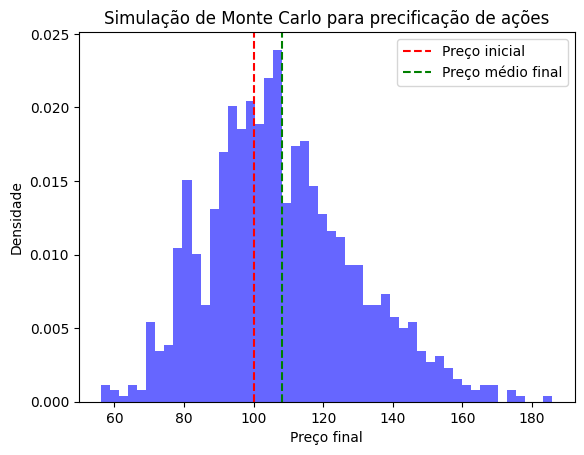

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir variáveis
S0 = 100   # preço inicial da ação
mu = 0.05  # taxa de retorno esperada
sigma = 0.2  # desvio padrão do retorno

# Definir número de simulações e número de dias
n_simulacoes = 1000
n_dias = 252

# Gerar números aleatórios com base na distribuição normal
np.random.seed(123)
simulacoes_retorno = np.random.normal(loc=(mu/n_dias), scale=(sigma/np.sqrt(n_dias)), size=(n_dias, n_simulacoes))

# Calcular preços finais simulados
precos_finais = S0 * np.exp(np.cumsum(simulacoes_retorno, axis=0))

# Calcular média e desvio padrão dos preços finais simulados
media = np.mean(precos_finais[-1])
desvio_padrao = np.std(precos_finais[-1])

# Plotar histograma dos preços finais simulados
plt.hist(precos_finais[-1], bins=50, density=True, alpha=0.6, color='b')
plt.xlabel('Preço final')
plt.ylabel('Densidade')
plt.title('Simulação de Monte Carlo para precificação de ações')
plt.axvline(x=S0, linestyle='--', color='r', label='Preço inicial')
plt.axvline(x=media, linestyle='--', color='g', label='Preço médio final')
plt.legend()
plt.show()


In [ ]:
C = 4000
taxa = 0.65 # em %
i = taxa/100
n = 1*12 # tempo
M=0
for j in range(n+1):
  M += C*(1+i)**j
  #print(j+1)
print(f"M = {M}")

M = 54077.1286971643


In [ ]:
print(4*12*3000)

144000


In [ ]:
print(54101*0.65/100)

351.6565


$$ \frac{a}{2}$$